In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Makeover Monday 2020 W6 –– US Wartime Living

For this week's challenge, we are looking at the percentage of lifetime according to birth year where the USA was at war.

Source Article: [Nearly a quarter of Americans have never experienced the U.S. in a time of peace](https://www.washingtonpost.com/politics/2020/01/08/nearly-quarter-americans-have-never-experienced-us-time-peace/)

Data Source: [Washington Post](https://www.washingtonpost.com/)

Makeover Monday Data: [data.world](https://data.world/makeovermonday/2020w6)

## Data Analysis

### Loading the Data:

In [57]:
df = pd.read_excel("US life at war.xlsx")

### Summary Statistics:

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 2 columns):
Birth year                               115 non-null int64
% of your life the US has been at war    115 non-null float64
dtypes: float64(1), int64(1)
memory usage: 1.9 KB


In [59]:
df.describe()

,Birth year,% of your life the US has been at war
count,115.000000,115.000000
mean,1962.000000,0.574635
std,33.341666,0.221140
min,1905.000000,0.348000
25%,1933.500000,0.436000
50%,1962.000000,0.471000
75%,1990.500000,0.673000
max,2019.000000,1.000000


In [60]:
df.head()

,Birth year,% of your life the US has been at war
0,1905,0.348
1,1906,0.351
2,1907,0.354
3,1908,0.357
4,1909,0.360


### Initial Graph:

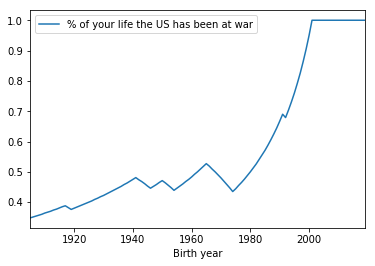

In [61]:
df.plot(x="Birth year", y="% of your life the US has been at war")

### Data Exploration:

In [75]:
df_wars = pd.DataFrame(np.array([['WW1', 1914, 1918], 
                                 ['WW2', 1939, 1945], 
                                 ['Korean War', 1950, 1953],
                                 ['Vietnam War', 1955, 1975],
                                 ['Gulf War', 1990, 1991],
                                 ['Afghanistan War', 2001, 2019]]),
                       columns=['War', 'Start Year', 'End Year'])

df['War'] = None

for index, row in df_wars.iterrows():
    for val in range(int(row['Start Year']), int(row['End Year']) + 1):
        df.loc[df['Birth year'] == val, 'War'] = row['War']

df.tail()

,Birth year,% of your life the US has been at war,War
110,2015,1.0,Afghanistan War
111,2016,1.0,Afghanistan War
112,2017,1.0,Afghanistan War
113,2018,1.0,Afghanistan War
114,2019,1.0,Afghanistan War


In [ ]:
df.groupby('War').describe()

### Deeper Data Graph:

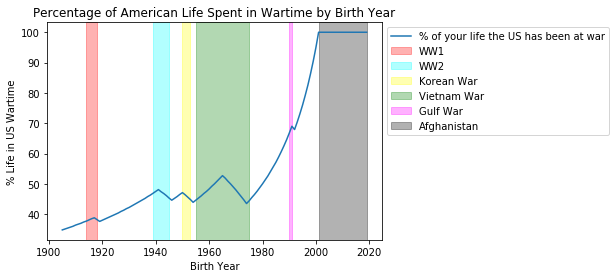

In [39]:
fig, ax = plt.subplots()
ax.plot(df['Birth year'], 100*df['% of your life the US has been at war'])
ax.set(xlabel = 'Birth Year', 
       ylabel = '% Life in US Wartime', 
       title = 'Percentage of American Life Spent in Wartime by Birth Year')

colors = ['red', 'cyan', 'yellow', 'green', 'magenta', 'black']
for index, row in df_wars.iterrows():
    ax.axvspan(int(row['Start Year']), row['End Year'], 
               color = colors[index], 
               alpha=0.3, 
               label = row['War'])
ax.legend(bbox_to_anchor=(1, 1))

fig.savefig("pyplot.png")
plt.show()